# **Data and Analysis Plan: Boston Marathon Weather Conditions**

- Justin Radist
- Suneet Pathangay
- Zhenzhen Liu

## Project Goal:

Our project aims to explore the relationship between various MLB team and individual player statistics and the performance of teams in the playoffs and World Series. We have chosen to focus on ... for the last ... years. Specifically, we ask:
- 
- 

We are using https://www.baseball-reference.com/ for our main data source, which we will webscrape from. We are not using any API.

We have chosen to focus on the results for the top 100 men & women for the Boston Marathon for the last twenty-two years. Specifically, we ask:
- What are the optimal weather conditions for peak performance/fastest speed?
- Does the weather impact men differently than women?

## Pipeline Overview:

For the Weather API:
- call_weather()
 - requests the weather data for a certain latitude, longitude, and date
- get_historical_weather()
 - using call_weather(), compiles historical weather data for given parameters into a clean dataframe

For scraping the Baseball Reference website:
- get_player_url(player) and get_team_url(team)
  - builds the URLs needed to access a certain player's or team's statistics page.
- then, get_player_df(), get_team_batting_df(), and get_team_pitching_df()
  - builds dataframes of a player's common careers stats table, a team's common batting stats by roster member for a single season, and a team's common pitching stats by pitching staff member for a single season, respectively.
 
These functions utilize other functions we've already written that perform tasks such as getting BeautifulSoup objects a certain player's or team's page on Baseball Reference and creating dictionaries from the stat tables on these pages.



For scraping the marathon guide website:
- get_top_100() 
  - builds a dataframe of top 100 marathon runners based on inputted race date and sex

This is the only function we have at the moment. It will be utilized with a dictionary of marathon dates in a for-loop to create a dataframe for all of the finish times throughout the years. 

### Pipeline:

#### 1. Building URLs and Webscraping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
def build_player_url(player):
    """ Constructs the URL of any MLB player's Baseball Reference stat page
    
    Args:
        player (str): a baseball player's full name
    
    Returns:
        url (str): the URL that can be used to retrieve the given player's
        stats from BaseballReference.com
    """
    first_init = player[0]
    first_two_letters = player[0:2]
    player_name_list = player.split(' ')
    # get last name except for last letter. Gets position 1 instead of -1 in case of a Jr./Sr. or II/III
    last_name = player_name_list[1][:-1]
    
    url = f"https://www.baseball-reference.com/players/{first_init}/{last_name}{first_two_letters}01.shtml"
    
    return url

In [ ]:
def build_team_url(team, year):
    """ Constructs the URL of any MLB team's Baseball Reference stat page for a single season
    
    Args:
        team (str): the name or 3-letter abbreviation of one of the 30 current MLB teams in existence
        year (str or int): the year/season to get team data for
    
    Returns:
        url (str): the URL that can be used to retrieve the given team's
        stats for the given year from BaseballReference.com
    """
    pass

In [ ]:
player = 'carlos correa'
team = 'NYM'
season = '2022'
player_url = build_player_url(player)
team_url = build_team_url(team, season)

In [ ]:
def get_player_soup(url):
    """ gets a BeautifulSoup object of a MLB player's BaseballReference.com
        page by webscraping the page's HTML code
    
    Args:
        url (str): the URL that can be used to retrieve the given player's
        stats from BaseballReference.com
    
    Returns:
        soup (BeautifulSoup): a beautiful soup object of the given MLB
        player's BaseballReference.com page
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    return soup

In [ ]:
def get_soup(url):
    """ gets a BeautifulSoup object of a MLB player's or team's BaseballReference.com
        page by webscraping the page's HTML code
    
    Args:
        url (str): the URL that can be used to retrieve the given player's or team's
        stats from BaseballReference.com
    
    Returns:
        soup (BeautifulSoup): a beautiful soup object of the given MLB
        player's or team's BaseballReference.com page
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    return soup

In [ ]:
player_soup = get_player_soup(player_url)
team_soup = get_soup(team_url)

#### 2. Cleaning Data and Building Dataframes

In [ ]:
def get_player_dict(player_soup):
    """ creates a dictionary of all an baseball player's MLB stats
        by web scraping BaseballReference.com
    
    Args:
        player_soup (BeautifulSoup): a beautiful soup object of a MLB
        player's BaseballReference.com page
    
    Returns:
        player_dict (dict): a dictionary of all the given player's MLB
        stats, where the keys are the years played in the MLB
    """
    # build dictionary of player stats row by row (season by season) without knowing years they've played
    player_stats = player_soup.find_all(class_='row_summable', id='batting_standard')[0].find_all('tbody')[0].find_all(class_='full')
    player_dict = {}
    for item in player_stats:
        # list will add current year's stats to
        temp_list = []
        # get list of tags, where each tag is different stat for current year
        tds = item.find_all('td')
        # loop through the tags and add each tags' text (stat) to the temp list
        for td in tds:
            temp_list.append(td.text)
        # add current list of stats to the year they correspond to
        player_dict[item.find('th').text] = temp_list
    
    return player_dict

In [ ]:
def get_team_dict(team_soup, stat_type):
    """ creates a dictionary of all an baseball player's MLB stats
        by web scraping BaseballReference.com
    
    Args:
        team_soup (BeautifulSoup): a beautiful soup object of a MLB
        team's BaseballReference.com page
        stat_type (str): specify if want a team's batting stats or pitching stats
    
    Returns:
        team_dict (dict): a dictionary of all the team's stats (either batting or pitching),
        where the keys are the players on the team's roster that season
    """
    pass

In [ ]:
player_dict = get_player_dict(player_soup)
team_dict = get_team_dict(team_soup)

In [ ]:
# get player stat names (used for df col names for a player). [1:] gets rid of 'Year'
header = player_soup.find_all(class_='row_summable')[0].find_all(attrs={'aria-label': True})[1:]
stat_names = []
for item in header:
    stat_names.append(item.text)

# get team stat names
pass

In [ ]:
def get_player_df(player_dict):
    """ creates a df of all a baseball player's MLB stats
    
    Args:
        player_soup (BeautifulSoup): a dictionary of a MLB
        player's career stats by season
    
    Returns:
        player_df (pd.DataFrame): a df of all the given player's MLB
        stats
    """
    player_df = pd.DataFrame()

    for year in player_dict:
        player_series = pd.Series(player_dict[year], index=stat_names)
        player_df = pd.concat([player_df, player_series.to_frame().T])

    #player_df.columns = stat_names
    player_df.index = player_dict.keys()
    
    return player_df

In [ ]:
def get_team_df(team_dict):
    """ creates a df of a team's MLB stats (either batting or pitching) by player for a given season
    
    Args:
        team_soup (BeautifulSoup): a dictionary of a team's stats by player for a single season
    
    Returns:
        team_df (pd.DataFrame): a df of all the given team's stats for a single season where each
        row is a player on the team for that year
    """
    pass

In [ ]:
player_df = get_player_df(player_dict)
player_df.head()

In [ ]:
team_df = get_team_df(team_dict)
team_df.head()

#### 1. Weather API Code

In [1]:
## Weather API Code

import requests
import json

# function to request weather data
def call_weather(latlon, date):
    '''
    returns historical weather data for a given date and location
    
    args:
        latlon (tuple): tuple (lat, long)
        date (str): date in format YYYY-MM-DD
    
    out:
        weather_dict (json): return from API
    '''
    # separating tuple into lat and lon
    lat, lon = latlon
    # creating url to request
    url = f'https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date={date}&end_date={date}&hourly=temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,cloudcover,windspeed_10m&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch'
    url_text = requests.get(url).text
    
    # convert json to a nested dict
    weather_dict = json.loads(url_text)
    return weather_dict



In [2]:
import pandas as pd

# format of data that we want to look for
race_dict = {
    'boston': {
        'start_latlon': (42.22980835608579, -71.51816911558873),
        'finish_latlon': (42.3497543253191, -71.07859571477307),
        'race_dates': ['2022-04-18', '2021-10-11', '2019-04-15', '2018-04-16', '2017-04-17',
                      '2016-04-18','2015-04-20','2014-04-21','2013-04-15','2012-04-16',
                      '2011-04-18','2010-04-19','2009-04-20','2008-04-21','2007-04-16',
                      '2006-04-17','2005-04-18','2004-04-19','2003-04-21','2002-04-15',
                      '2001-04-16','2000-04-17']
    }
}

def get_historical_weather(race_dict):
    '''
    returns df of weather data for given race details
    
    Args:
        race_dict (dict): {race location: {start coords: tup, finish coords: tup, race_dates: []}}
        
    Returns:
        weather_df (df): retrieved and cleaned weather data
    '''
    
    # storage dict to hold all retrieved data
    data_dict = {
        'location': [], 'date': [], 
        'start_temp': [], 'temp_diff': [], 
        'start_humidity': [], 'humidity_diff': [], 
        'start_apparent_temp': [], 'apparent_temp_diff': [],
        'start_cover': [], 'cover_diff': [], 
        'start_precip': [], 'precip_diff': [], 
        'start_windspeed': [], 'windspeed_diff': []
    }

    # loops through each race location (allows for us to expand to more races if we want)
    for r in race_dict:
        race = race_dict[r]
        # loops for each race date for the current race location
        for d in race['race_dates']:
            start = call_weather(race['start_latlon'], d)
            finish = call_weather(race['finish_latlon'], d)
            start_cond = start['hourly']
            finish_cond = finish['hourly']

            # adding this specific race's data to the big dict
            data_dict['location'].append(r)
            data_dict['date'].append(d)

            # finding start conditions, using 8am (index 9) as a start time
            start_temp = start_cond['temperature_2m'][9]
            start_humidity = start_cond['relativehumidity_2m'][9]
            start_apparent_temp = start_cond['apparent_temperature'][9]
            start_cover = start_cond['cloudcover'][9]
            start_precip = start_cond['precipitation'][9]
            start_windspeed = start_cond['windspeed_10m'][9]

            # finding difference between start and finish (assuming 2 hours in between so 10am)
            temp_diff = finish_cond['temperature_2m'][11] - start_temp
            humidity_diff = finish_cond['relativehumidity_2m'][11] - start_humidity
            apparent_temp_diff = finish_cond['apparent_temperature'][11] - start_apparent_temp
            cover_diff = finish_cond['cloudcover'][11] - start_cover
            precip_diff = finish_cond['precipitation'][11] - start_precip
            windspeed_diff = finish_cond['windspeed_10m'][11] - start_windspeed

            # adding the above data to the storage dictionary
            data_dict['start_temp'].append(start_temp)
            data_dict['start_humidity'].append(start_humidity)
            data_dict['start_apparent_temp'].append(start_apparent_temp)
            data_dict['start_cover'].append(start_cover)
            data_dict['start_precip'].append(start_precip)
            data_dict['start_windspeed'].append(start_windspeed)

            data_dict['temp_diff'].append(temp_diff)
            data_dict['humidity_diff'].append(humidity_diff)
            data_dict['apparent_temp_diff'].append(apparent_temp_diff)
            data_dict['cover_diff'].append(cover_diff)
            data_dict['precip_diff'].append(precip_diff)
            data_dict['windspeed_diff'].append(windspeed_diff)

    weather_df = pd.DataFrame(data_dict)
    return weather_df

weather_data = get_historical_weather(race_dict)
weather_data.head()

,location,date,start_temp,temp_diff,start_humidity,humidity_diff,start_apparent_temp,apparent_temp_diff,start_cover,cover_diff,start_precip,precip_diff,start_windspeed,windspeed_diff
0,boston,2022-04-18,34.3,3.0,76,5,27.3,3.6,0,0,0.000,0.000,5.8,0.1
1,boston,2021-10-11,56.4,3.4,99,-3,55.5,3.9,90,2,0.000,0.000,6.6,1.0
2,boston,2019-04-15,61.0,0.0,97,2,57.6,1.7,100,0,0.000,0.083,16.2,-3.4
3,boston,2018-04-16,33.0,4.3,100,-4,23.8,2.3,100,0,0.012,0.004,12.9,6.3
4,boston,2017-04-17,59.2,0.8,90,-3,57.7,0.3,10,4,0.000,0.000,8.3,1.4


#### 2. Webscraping

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt

def get_top_100(date,sex):
        """ creates a dataframe with the top 100 runners data for the Boston marathon from marathonguide.com

        Args:
            date (string, yyyy-mm-dd): date of the marathon
            sex (string): sex assigned at birth for runner, male or female

        Returns:
            df_marathon (dataframe): dataframe that includes the top 100 runners,
            this has columns that represent their name, sex, and time for the marathon
        """

        # Split string into the month, day, and year
        dateList = date.split('-')
        # remove first two digits of year number
        dateList[0] = dateList[0][2:]

        # assign year, month, and day values
        year = dateList[0]
        month = dateList[1]
        day = dateList[2]

        # convert sex to a identifier string to be used to query the website
        sexString = 'M' if sex == 'Male' else 'F'

        #marathonGuideURL = f'http://www.marathonguide.com/results/browse.cfm?MIDD=15220418'
        marathonGuideURL = f'http://www.marathonguide.com/results/browse.cfm?MIDD=15{year}{month}{day}'

        # get session
        s = requests.session()
        p = s.get(marathonGuideURL)

        # set the search parameters for marathonguide query
        race_range = sexString + ',1,100,14065'

        # navigate to page with tables we want for our query
        rp = 'http://www.marathonguide.com/results/makelinks.cfm'
        # navigate to page with tables we want for our query
        data = {'RaceRange':race_range, 
                'RaceRange_Required':'You must make a selection before viewing results.', 
                'MIDD':f'15{year}{month}{day}', 
                'SubmitButton':'View'}
        headers = {"Referer":f"http://www.marathonguide.com/results/browse.cfm?MIDD=15{year}{month}{day}",
                "User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36"}

        results = s.post(rp, data=data, headers=headers)

        soup = BeautifulSoup(results.content)

        # create empty dataframe
        df_marathon = pd.DataFrame()

        # empty columns for df that we will fill
        names_column = []
        sex_column = []
        times_column = []

        # iterate through each row of the marathonguide table 
        rows =  soup.find('tr',{'bgcolor':'#CCCCCC'}).parent


        # initialize index to 0 and start iterating through the rows of the table
        i = 0
        for row in rows:

        # the first 4 rows of the table don't contain data,
        # every other row contains no data so we only look at odd numbered ones
                if i > 4 and i % 2 == 1:

                        # split the multiple lines of div text into a list
                        featureList = row.text.split('\n')
                        
                        # pull out the name and time for this runner
                        name = featureList[1]
                        time = featureList[3]

                        # remove the (M) or (F) in name
                        name = name.split(' ')
                        name = name[0] + ' ' + name[1]
                
                        names_column.append(name)

                        # append sex to sex column
                        sex_column.append(sex)

                        # remove random text after the time numbers, only need to use for the gun time
                        # time = time.split(' ')
                        # time = time[0]

                        # split the time into hours, minutes, seconds
                        timeList = time.split(':')
                        timeInSeconds = (int(timeList[0]) * 60 * 60) + (int(timeList[1]) * 60) + int(timeList[2])
                        times_column.append(timeInSeconds)
        
                # increase index by 1
                i += 1

        # turn these lists into dataframe columns
        df_marathon['name'] = names_column
        df_marathon['sex'] = sex_column
        df_marathon['time (seconds)'] = times_column

        return df_marathon
    

get_top_100('2022-04-18','Male')

,name,sex,time (seconds)
0,Evans Chebet,Male,7611
1,Lawrence Cherono,Male,7641
2,Benson Kipruto,Male,7647
3,Gabriel Geay,Male,7673
4,Eric Kiptanui,Male,7727
...,...,...,...
95,Drew Kiracofe,Male,8958
96,Max Haiss,Male,8959
97,Erik Hinrichsen,Male,8974
98,Dylan Stevens,Male,8976


## Visualizations:

This visualization plots average finish time for top 100 finishers by gender against humidity over the last 10 editions of the Boston Marathon.

Text(0.5, 1.0, 'average time vs. start humidity')

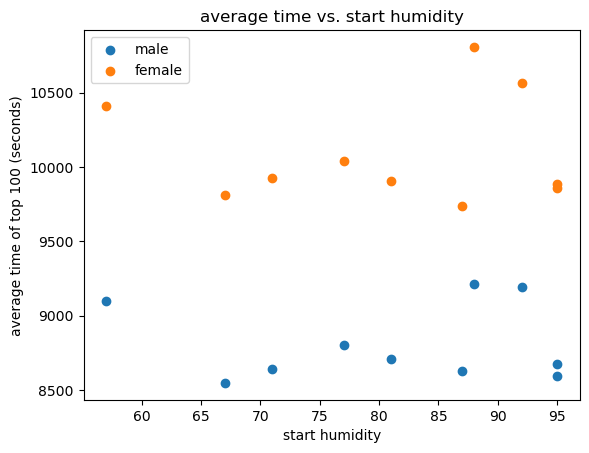

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# plotting last 10 races' worth of data
dates = ['2022-04-18', '2021-10-11', '2019-04-15', '2018-04-16', '2017-04-17',
         '2016-04-18', '2015-04-20', '2014-04-21', '2013-04-15', '2012-04-16']

# getting results data for the last 10 races, averaging top 100 times per gender
male = []
female = []
for d in dates:
  male.append(np.mean(get_top_100(d,'Male')['time (seconds)'].tolist()))
  female.append(np.mean(get_top_100(d,'Female')['time (seconds)'].tolist()))

# filtering out just the humidity from the last 10 races
humidity_10races = weather_data['start_humidity'].tolist()[:10]

# plotting as scatter
plt.scatter(humidity_10races, male, label='male')
plt.scatter(humidity_10races, female, label='female')
plt.legend()
plt.xlabel('start humidity')
plt.ylabel('average time of top 100 (seconds)')
plt.title('average time vs. start humidity')

This visualization plots average finish time for top 100 finishers by gender against temperature over the last 22 editions of the Boston Marathon.

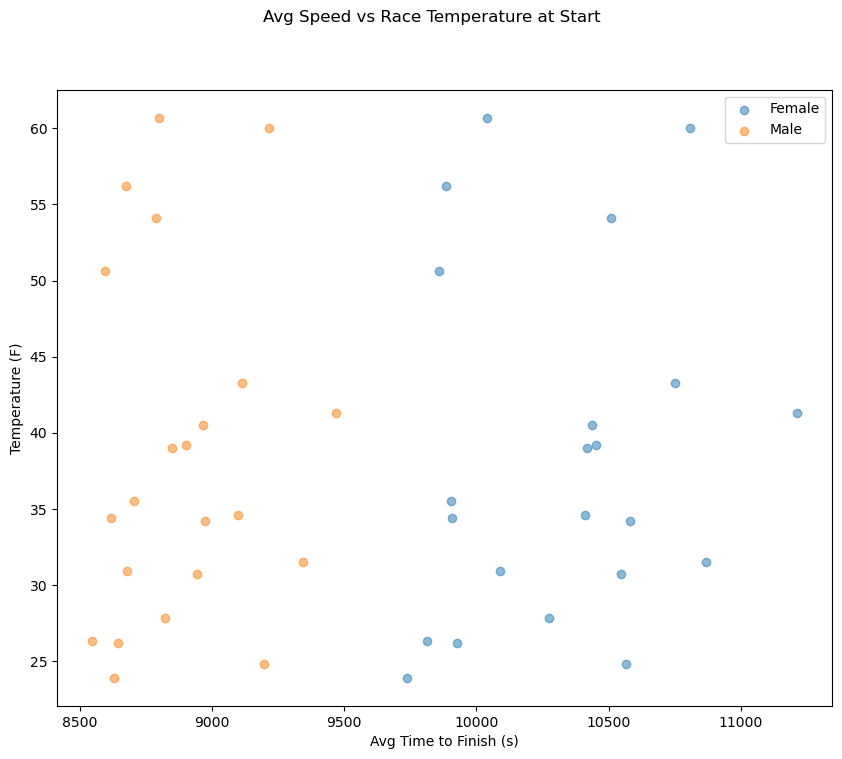

In [5]:
race_dates = ['2022-04-18', '2021-10-11', '2019-04-15', '2018-04-16', '2017-04-17',
                      '2016-04-18','2015-04-20','2014-04-21','2013-04-15','2012-04-16',
                      '2011-04-18','2010-04-19','2009-04-20','2008-04-21','2007-04-16',
                      '2006-04-17','2005-04-18','2004-04-19','2003-04-21','2002-04-15',
                      '2001-04-16','2000-04-17']

all_female_avg_speeds = []
female_str = ['Female','Female','Female','Female','Female',
             'Female','Female','Female','Female','Female',
             'Female','Female','Female','Female','Female',
             'Female','Female','Female','Female','Female',
             'Female','Female']

all_male_avg_speeds = []
male_str = ['Male','Male','Male','Male','Male',
           'Male','Male','Male','Male','Male',
           'Male','Male','Male','Male','Male',
           'Male','Male','Male','Male','Male',
           'Male','Male']

# loops through all race dates
# gets the avg speed for the top 100 women and appends it to a list
for date in race_dates:  
    female_runners = get_top_100(date,'Female')
    female_avg_speed = female_runners['time (seconds)'].mean()
    all_female_avg_speeds.append(female_avg_speed)

# a dataframe is initalized with the avg speeds and the string 'Female' for each row
female_df = pd.DataFrame()
female_df['Avg Speed (s)'] = all_female_avg_speeds
female_df['Sex'] = female_str

# the same process is repeated for males as above
for date in race_dates:  
    male_runners = get_top_100(date,'Male')
    male_avg_speed = male_runners['time (seconds)'].mean()
    all_male_avg_speeds.append(male_avg_speed)

male_df = pd.DataFrame()
male_df['Avg Speed (s)'] = all_male_avg_speeds
male_df['Sex'] = male_str

# the two resulting df's are put together
all_avg_speeds = pd.concat([female_df, male_df])

# the sexes are our variables of separation 
two_sexes = ['Female','Male']

from matplotlib import pyplot as plt

for sex in two_sexes:
    # boolean index
    bool_sex = all_avg_speeds['Sex'] == sex
    df_sex = all_avg_speeds.loc[bool_sex, :]

    # scatter
    plt.scatter(df_sex['Avg Speed (s)'],
                weather_data['start_apparent_temp'], alpha=.5, label=sex)
    
plt.legend()
plt.xlabel('Avg Time to Finish (s)')
plt.ylabel('Temperature (F)')
plt.gcf().set_size_inches(10, 8)
plt.suptitle('Avg Time vs Race Temperature at Start');

## Analysis/ML Plan:

The machine learning model we think is most appropriate for our project potentially might be multivariate regression ...

The machine learning model we think is most appropriate for our project is linear regression (which we are just now covering in class). We understand that linear regression can be utilized to predict a numeric variable y from one or more numeric variables x. We may investigate using linear regression with predictors such as the weather (temperature, humidity, wind speed, and precipitation) and gender (female, male) to see if we can predict a runner's finish time. We expect that some of these features will have an impact on the runner's finish time, though from the preliminary analysis it is possible that gender is the most important feature. It may be that some of the numeric features are related non-linearly, so we may also investigate some polynomial regression. We will make sure that we scale our numeric features before implementing the model, and will also make sure we cross validate while exploring different models. 

We may also explore models outside the scope of the course, though we expect regression to be the most appropriate for our questions of interest.
 